## Final Project Submission

Please fill out:
* Student name: Lyndsay Maggin
* Student pace: self paced / part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understand the Data

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Column Definitions

##### This dataset was created in 2016, therefore assume data is being used for 2016 housing sales

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront (0,1,nan)
* **view** - Has been viewed (0-4, nan)
* **condition** - How good the condition is ( Overall ) (1-5)
* **grade** - overall grade given to the housing unit, based on King County grading system (3-13)
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

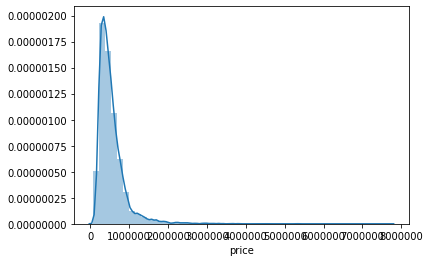

In [6]:
#distribution of prices
#not interested in the top 5%?
sns.distplot(df['price'])

In [7]:
#not interested in bedoorms more than 6?
pd.value_counts(df.bedrooms)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
#not interested in bathrooms greater than 6?
pd.value_counts(df.bathrooms)

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
#rennovated recently or not?
pd.value_counts(df.yr_renovated)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
columns =list(df.columns)

In [11]:
for col in columns:
    print(col,':', df[col].nunique())

id : 21420
date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 304
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


In [12]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

# Synopsis

#### The King County dataset is a list of homes sold between May 2014 and May 2015 in King County, Washington State (inclusive of Seattle). It is 2016 and I am a realtor in the King County Washington area working with a new family to find their forever home. Using this dataset, with my newly learned data science tools, I can predict the price that a home of interest will sell at and therefore can assist the family in entering a proper bid. 

### Data Cleaning

In [14]:
#Out of 21597 homes, 63 do not have view information, 2376 do not have waterfront information and 3842 do not have renovation information.
#This makes up 0%, 11% and 18% of total homes respectively. For data munging purposes I will exclude these values.

df = df.dropna()

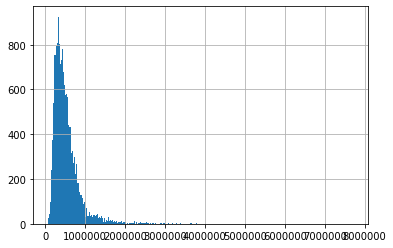

In [15]:
#the distribution of home prices is highly skewed with a long right tail
#for the purpose of this model I will remove the top 10% in order to mitigate skewed results
df['price'].hist(bins='auto')

In [16]:
df['price'].quantile([.05, .25, .5, .75, .9])

0.05    212000.0
0.25    321000.0
0.50    450000.0
0.75    644875.0
0.90    888900.0
Name: price, dtype: float64

In [17]:
top_ten = df['price'].quantile(.9)

In [18]:
df = df[df['price']<top_ten]

In [19]:
df.shape

(14185, 21)

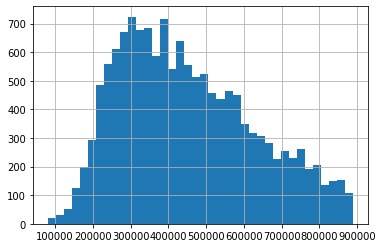

In [20]:
df['price'].hist(bins='auto')

In [21]:
#according to zipdatamaps.com, the most expensive zipcode in King County is 98039 (Medina)
#Latitude =47.627 Longitude = -122.233
#create a column in df for the distance of each home from Medina rather than using zips and long and lats

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

medina_lat = radians(abs(47.627))
medina_lon = radians(abs(-122.233))

def distance(lat, long):

    lat = radians(abs(lat))
    long = radians(abs(long))
    
    dlon = medina_lon - (long)
    dlat = medina_lat - (lat)

    a = sin(dlat / 2)**2 + cos(medina_lat) * cos(lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    miles = round(distance * 0.621371, 3)
    
    return miles


In [22]:
df['medina_dist'] =  df.apply(lambda row : distance(row['lat'], row['long']), axis = 1)

In [23]:
df['yr_renovated']

1        1991.0
3           0.0
4           0.0
6           0.0
8           0.0
          ...  
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: yr_renovated, Length: 14185, dtype: float64

In [24]:
#create a categorical variable for yr_renovated
#only recently renovated homes will see a premium <5 years

df['recent_reno'] = df['yr_renovated']>2010.0
df['recent_reno'] = df['recent_reno'].astype(int)

In [25]:
pd.value_counts(df.recent_reno)

0    14081
1      104
Name: recent_reno, dtype: int64

In [26]:
#similarly new construction homes warrant a premium
df['new_con'] = df['yr_built']>2010.0
df['new_con'] = df['new_con'].astype(int)

In [27]:
pd.value_counts(df.new_con)

0    13533
1      652
Name: new_con, dtype: int64

In [28]:
#pd.value_counts(df['sqft_basement'])
#given the number of homes without basements I will make this a categorical variable
df['basement'] = df['sqft_basement']!=0
df['basement'] = df['basement'].astype(int)
pd.value_counts(df['basement'])

0    9001
1    5184
Name: basement, dtype: int64

In [29]:
df['baths'] = round(df['bathrooms'], 0)

In [30]:
columns = list(df.columns)

In [31]:
categorical = ['bedrooms', 'baths', 'floors', 'view', 'condition', 'grade', 'waterfront', 'recent_reno', 'new_con', 'basement']

In [32]:
continuous = columns
for cat in categorical:
    countinuous = continuous.remove(cat)

In [33]:
continuous.remove('price')
continuous.remove('id')
continuous.remove('date')
continuous.remove('zipcode')
continuous.remove('lat')
continuous.remove('long')
continuous.remove('yr_built')
continuous.remove('yr_renovated')
continuous.remove('sqft_basement')
continuous.remove('bathrooms')

In [34]:
continuous

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'medina_dist']

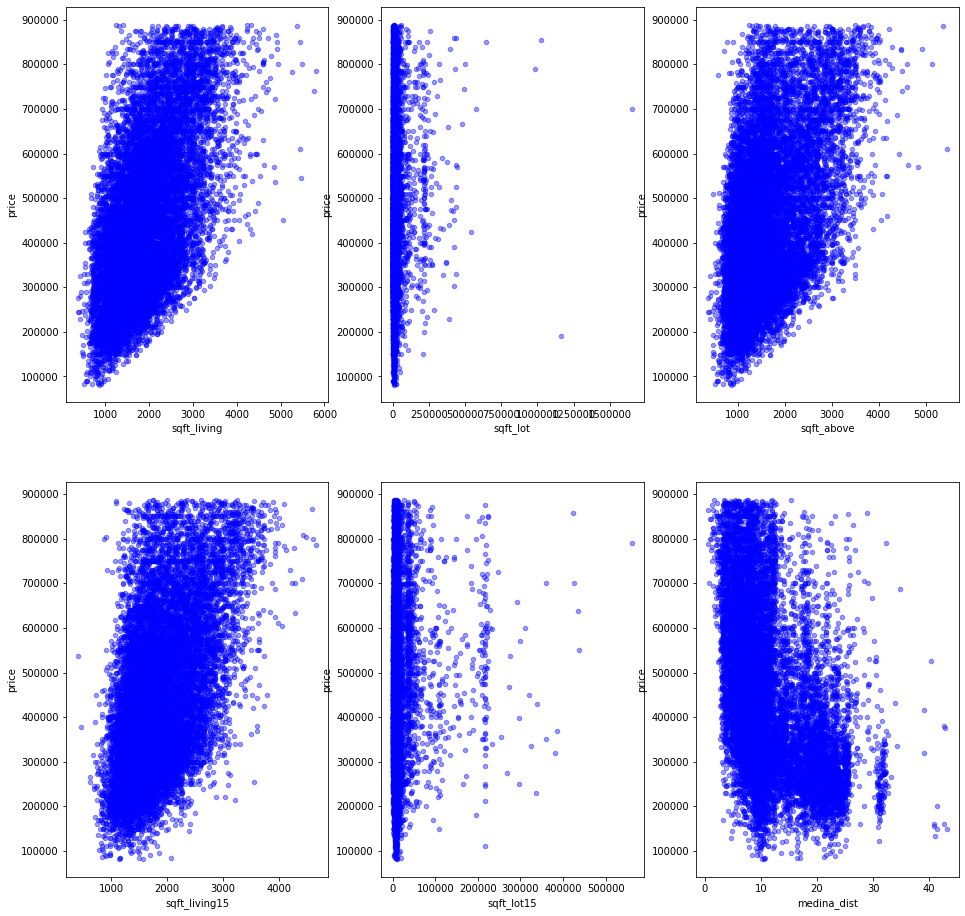

In [35]:
fig,axes = plt.subplots(2,3, figsize=(16,16))


for xcol, ax in zip(continuous, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### The sqft_lot variables do not seem to have a linear relationship with price and I can assume they are highly correlated with sqft_living

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D75025EFD0>,
      dtype=object)

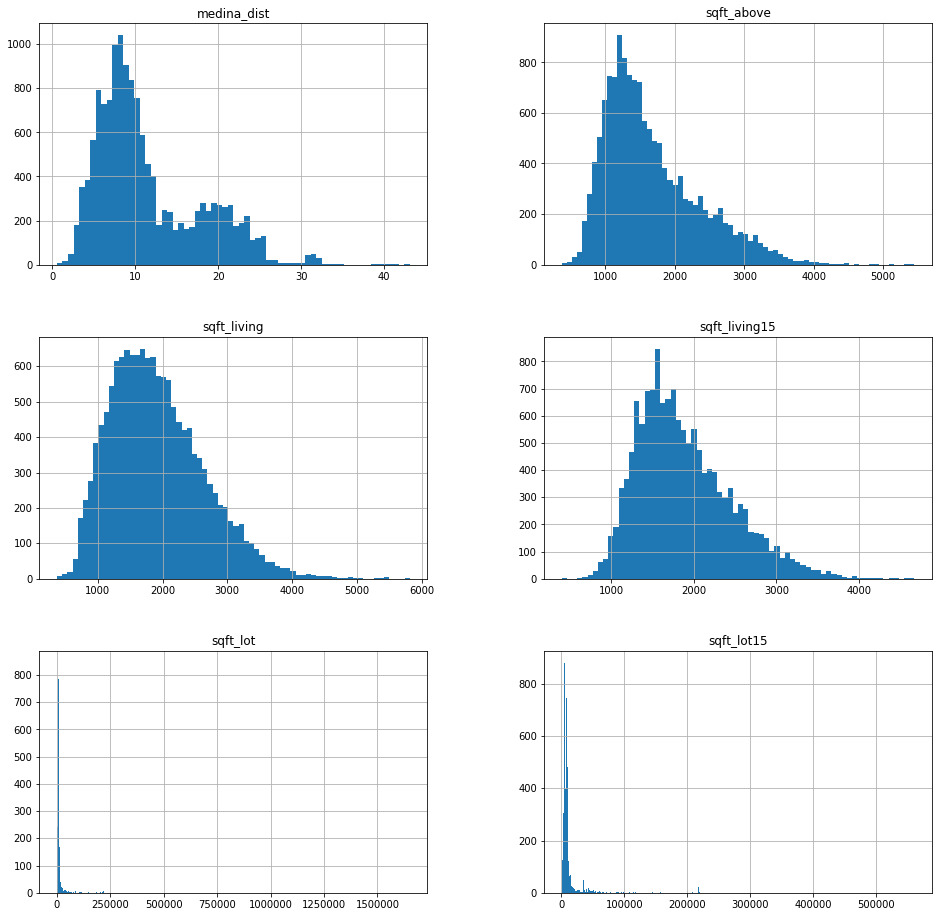

In [36]:
cont = df[continuous]
cont.hist(figsize = [16,16], bins='auto')

#### Sqft_lots have very long tails, might be good to remove the tails unless they are highly correlated with another function

In [37]:
categorical

['bedrooms',
 'baths',
 'floors',
 'view',
 'condition',
 'grade',
 'waterfront',
 'recent_reno',
 'new_con',
 'basement']

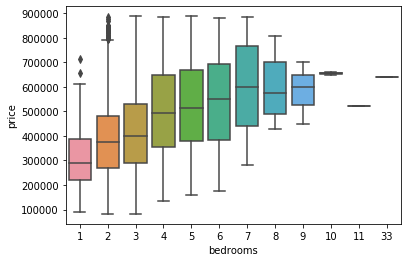

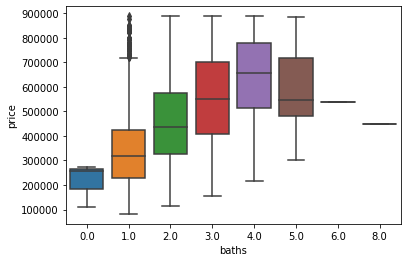

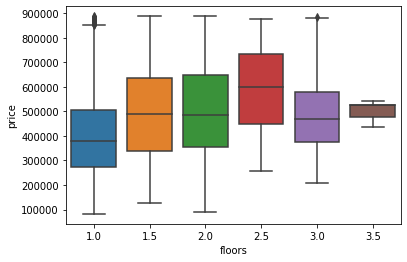

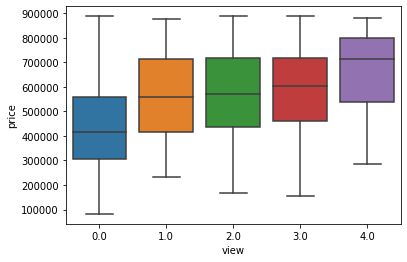

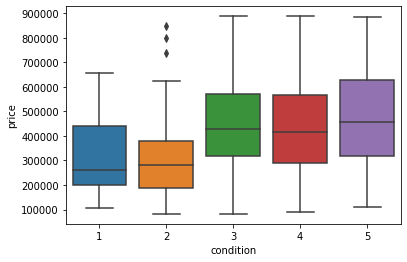

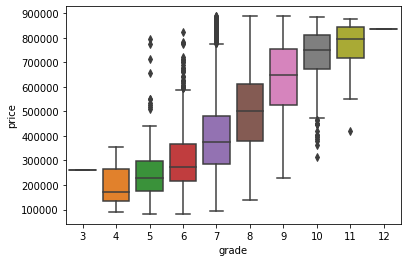

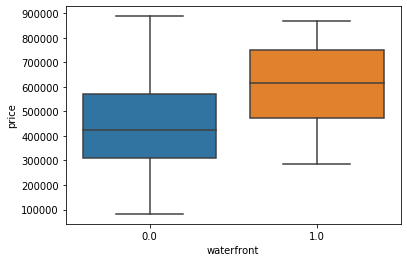

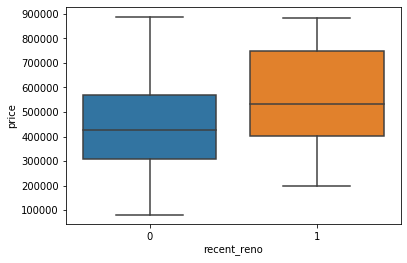

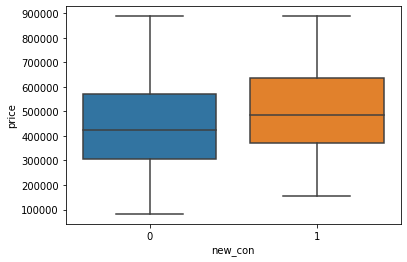

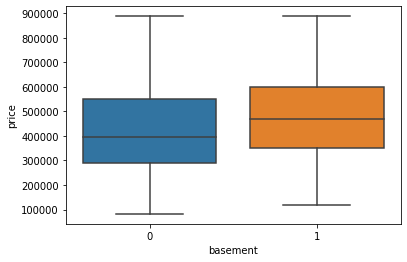

In [38]:
fig = plt.figure()
ax = plt.subplot(111)

for cat in categorical:
    sns.boxplot(cat, 'price', data=df)
    plt.show()

In [43]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,medina_dist,recent_reno,new_con,basement,baths
id,1.000000,0.026884,0.018119,0.034042,0.022691,-0.136148,0.035395,-0.001432,0.021734,-0.028680,...,-0.005296,0.001970,0.020260,0.023096,-0.147421,-0.008290,0.001706,0.007193,0.002444,0.025191
price,0.026884,1.000000,0.266779,0.407638,0.568304,0.086739,0.262149,0.039374,0.189746,0.028392,...,-0.006471,0.457742,0.088679,0.513317,0.076964,-0.446660,0.046612,0.075230,0.147728,0.373742
bedrooms,0.018119,0.266779,1.000000,0.478246,0.586707,0.017094,0.150309,-0.037058,0.019544,0.019485,...,-0.142301,-0.042588,0.139546,0.358580,0.014721,0.039086,0.016392,0.073119,0.141967,0.447990
bathrooms,0.034042,0.407638,0.478246,1.000000,0.698954,0.046524,0.502897,-0.027217,0.052392,-0.146526,...,-0.210551,-0.028926,0.254442,0.509190,0.046144,0.079120,0.026244,0.190372,0.131690,0.882964
sqft_living,0.022691,0.568304,0.586707,0.698954,1.000000,0.144011,0.329953,-0.011964,0.131072,-0.076864,...,-0.210032,-0.020562,0.295448,0.718636,0.157344,0.086159,0.007530,0.122631,0.174389,0.611193
sqft_lot,-0.136148,0.086739,0.017094,0.046524,0.144011,1.000000,-0.028024,0.014639,0.104493,-0.008625,...,-0.132135,-0.099896,0.226206,0.146587,0.704753,0.212641,-0.014094,-0.050348,-0.032904,0.055837
floors,0.035395,0.262149,0.150309,0.502897,0.329953,-0.028024,1.000000,-0.019087,-0.024359,-0.277069,...,-0.068070,0.033282,0.141366,0.260545,-0.034219,0.004681,-0.024855,0.249150,-0.285376,0.347684
waterfront,-0.001432,0.039374,-0.037058,-0.027217,-0.011964,0.014639,-0.019087,1.000000,0.298300,0.014969,...,0.042163,-0.042112,-0.059611,0.002422,0.028623,0.034109,-0.004274,-0.010916,0.018322,-0.018850
view,0.021734,0.189746,0.019544,0.052392,0.131072,0.104493,-0.024359,0.298300,1.000000,0.026776,...,0.101038,-0.040486,-0.072906,0.154095,0.094617,0.026351,0.008667,-0.032701,0.114133,0.072319
condition,-0.028680,0.028392,0.019485,-0.146526,-0.076864,-0.008625,-0.277069,0.014969,0.026776,1.000000,...,-0.008647,-0.026878,-0.094409,-0.133461,0.004434,-0.033763,-0.046255,-0.137733,0.112566,-0.069311


In [44]:
df_c = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_c['pairs'] = list(zip(df_c.level_0, df_c.level_1))
df_c.set_index(['pairs'], inplace = True)
df_c.drop(columns = ['level_0', 'level_1'], inplace = True)
df_c.columns =['cc']
df_c.drop_duplicates(inplace = True)

In [45]:
df_c.head(10)

,cc
pairs,
"(id, id)",1.000000
"(baths, bathrooms)",0.882964
"(sqft_living, sqft_above)",0.841198
"(sqft_basement, basement)",0.839604
"(lat, medina_dist)",0.771594
"(sqft_living15, sqft_living)",0.718636
"(sqft_lot, sqft_lot15)",0.704753
"(bathrooms, sqft_living)",0.698954
"(sqft_above, sqft_living15)",0.697901


#### As mentioned previously you can see that sqft_above and living are highly correlated however sqft_lot and living are not highly correlated. Whereas baths and beds are highly correlated (88%)

In [46]:
f = 'price ~ baths'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2303.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:45:47   Log-Likelihood:            -1.9051e+05
No. Observations:               14185   AIC:                         3.810e+05
Df Residuals:                   14183   BIC:                         3.810e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.509e+05   4398.207     57.035      0.000    2.42e+05    2.59e+05
baths       1.022e+05   2130.024     47.987      0.000     9.8e+04    1.06e+05
==============================================================================
Omnibus:                      686.494   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.422
Skew:                           0.476   Prob(JB):                    7.84e-143
Kurtosis:                       2.552   Cond. No.                         7.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
f = 'price ~ bedrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1087.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.04e-229
Time:                        20:45:48   Log-Likelihood:            -1.9105e+05
No. Observations:               14185   AIC:                         3.821e+05
Df Residuals:                   14183   BIC:                         3.821e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.793e+05   5410.136     51.619      0.000    2.69e+05     2.9e+05
bedrooms      5.2e+04   1577.224     32.966      0.000    4.89e+04    5.51e+04
==============================================================================
Omnibus:                      459.006   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.351
Skew:                           0.410   Prob(JB):                    1.09e-100
Kurtosis:                       2.673   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Looking at the adjusted r squared of the relationship between price and baths and price and beds you can see that baths have greater predictive power and given they are both highly correlated, I will therefore remove beds.

### Standardizing

In [48]:
continuous

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'medina_dist']

In [49]:
#based on the charts above, I have chosen the below variables
cont_var = ['sqft_living',
 'sqft_lot',
 'medina_dist']

##### Logging each continuous variable with the exception of geographic variables and number of beds/baths

In [50]:
df_logged = pd.DataFrame([])

df_logged['lg_sqft_living'] = np.log(df['sqft_living'])
df_logged['lg_sqft_lot'] = np.log(df['sqft_lot'])
df_logged['lg_medina_dist'] = np.log(df['medina_dist'])

In [51]:
logged_continuous_variables = ['lg_sqft_living', 'lg_sqft_lot','lg_medina_dist']

In [52]:
df_logged['price'] = df['price']

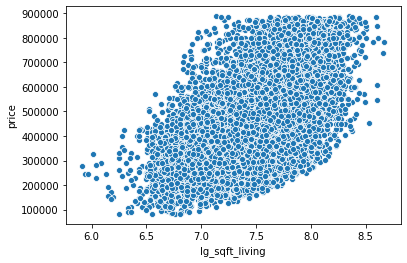

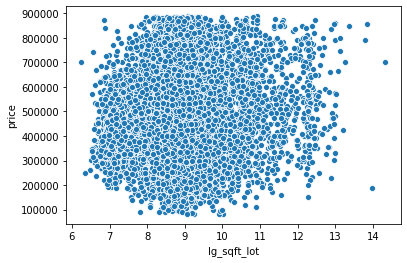

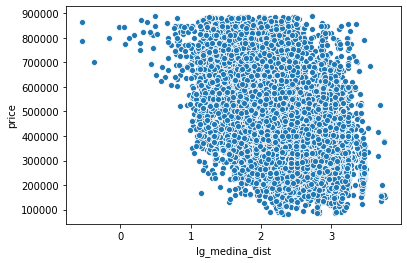

In [53]:
for var in logged_continuous_variables:
    sns.scatterplot(var, 'price', data=df_logged)
    plt.show()

#### There does not seem to be a linear relationship between price and logged_sqft_lot

##### Scaling the logged continuous variables

In [54]:
df_scaled = pd.DataFrame([])

df_scaled['sc_sqft_living'] = (df_logged['lg_sqft_living'] - np.mean(df_logged['lg_sqft_living']))/np.sqrt(np.var(df_logged['lg_sqft_living']))
df_scaled['sc_sqft_lot'] = (df_logged['lg_sqft_lot'] - np.mean(df_logged['lg_sqft_lot']))/np.sqrt(np.var(df_logged['lg_sqft_lot']))
df_scaled['sc_medina_dist'] = (df_logged['lg_medina_dist'] - np.mean(df_logged['lg_medina_dist']))/np.sqrt(np.var(df_logged['lg_medina_dist']))

In [55]:
df_scaled['price'] = df['price']

In [56]:
scaled_continuous_variables = ['sc_sqft_living', 'sc_sqft_lot','sc_medina_dist']

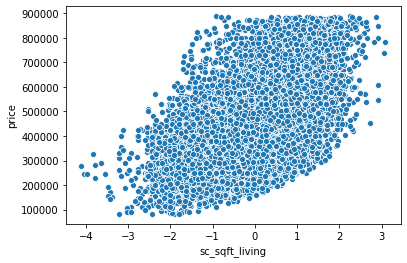

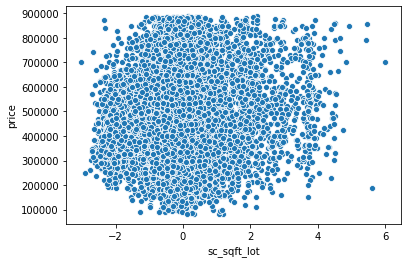

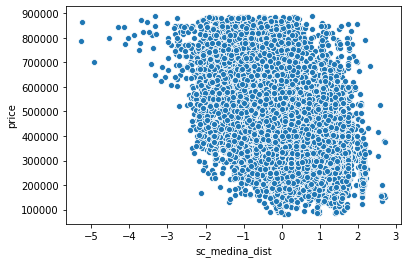

In [57]:
for var in scaled_continuous_variables:
    sns.scatterplot(var, 'price', data=df_scaled)
    plt.show()

In [58]:
df_std = df_scaled

In [59]:
df_std

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,price
1,0.949421,-0.071494,-0.482905,538000.0
3,0.242350,-0.485659,0.101561,604000.0
4,-0.159904,0.050918,-0.222153,510000.0
6,-0.106098,-0.138779,1.506536,257500.0
8,-0.009024,-0.036840,-0.118360,229500.0
...,...,...,...,...
21591,-0.809058,-1.996828,-0.199966,475000.0
21592,-0.403959,-2.147348,-0.576387,360000.0
21593,0.671097,-0.317226,0.024681,400000.0
21594,-1.462015,-1.949463,-1.766986,402101.0


##### Create dummy variables for categories

In [60]:
dummies = [ 'baths',
 'floors',
 'view',
 'condition',
 'grade']

In [61]:
for dum in dummies:
    x = pd.get_dummies(df[dum], prefix = dum[:4], drop_first = True)
    df_std = pd.concat([df_std, x], axis=1)

In [62]:
price = df_std['price']

In [79]:
df_std.head(1)

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,price,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,...,cond_5,grad_4,grad_5,grad_6,grad_7,grad_8,grad_9,grad_10,grad_11,grad_12
1,0.949421,-0.071494,-0.482905,538000.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
data = df_std.drop('price', axis=1)

In [84]:
data.head(1)

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_8.0,...,cond_5,grad_4,grad_5,grad_6,grad_7,grad_8,grad_9,grad_10,grad_11,grad_12
1,0.949421,-0.071494,-0.482905,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Choosing Variables

In [85]:
Y = price
X = data
k = len(list(data.columns))

In [86]:
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

In [87]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [88]:
for col in list(data.columns):
    data[col] = data[col].fillna(0)

In [89]:
for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [90]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [91]:
m = len(Y)
p = k
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[sc_sqft_living],3.086121e+14,0.309283,1,2.175759e+10,2.245140,2.245673,0.309234
2,"[sc_sqft_living, sc_medina_dist]",1.842566e+14,0.587608,2,1.299227e+10,1.340657,1.341723,0.587550
3,"[sc_sqft_living, sc_medina_dist, grad_9]",1.742622e+14,0.609977,3,1.228906e+10,1.268094,1.269693,0.609894
4,"[sc_sqft_living, sc_medina_dist, grad_9, grad_10]",1.639634e+14,0.633027,4,1.156440e+10,1.193317,1.195448,0.632923
5,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.561905e+14,0.650424,5,1.101779e+10,1.136913,1.139578,0.650301
6,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.516491e+14,0.660588,6,1.069900e+10,1.104018,1.107215,0.660445
7,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.494733e+14,0.665458,7,1.054698e+10,1.088331,1.092061,0.665293
8,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.477571e+14,0.669299,8,1.042737e+10,1.075988,1.080251,0.669112
9,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.460751e+14,0.673064,9,1.031015e+10,1.063893,1.068689,0.672856
10,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.444002e+14,0.676812,10,1.019344e+10,1.051849,1.057179,0.676584


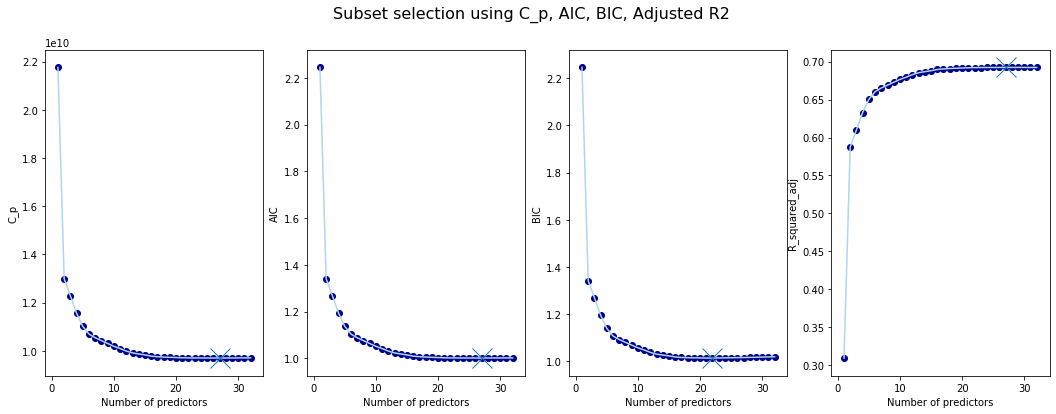

In [92]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

#### The lowest Mallow's Cp is at 25 variables whereas the highest Rsquared is at 26, the lowest AIC is also at 25. I will therefore use 25 variables

In [93]:
variables = df1['features'][25]

In [94]:
df_25 = data[variables]

In [95]:
df_25

,sc_sqft_living,sc_medina_dist,grad_9,grad_10,grad_8,sc_sqft_lot,view_4.0,cond_5,grad_11,view_2.0,...,cond_4,bath_4.0,cond_3,floo_3.0,grad_12,bath_2.0,floo_2.5,bath_8.0,grad_6,bath_6.0
1,0.949421,-0.482905,0,0,0,-0.071494,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.242350,0.101561,0,0,0,-0.485659,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.159904,-0.222153,0,0,1,0.050918,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,-0.106098,1.506536,0,0,0,-0.138779,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8,-0.009024,-0.118360,0,0,0,-0.036840,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.809058,-0.199966,0,0,1,-1.996828,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
21592,-0.403959,-0.576387,0,0,1,-2.147348,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
21593,0.671097,0.024681,0,0,1,-0.317226,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
21594,-1.462015,-1.766986,0,0,0,-1.949463,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Create train and test sets

In [96]:
Y = price
X = df_25
k = len(list(df_25.columns))

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)

In [98]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [99]:
train_residuals = y_hat_train - Y_train
test_residuals = y_hat_test - Y_test

In [100]:
mse_train = np.sum((Y_train - y_hat_train)**2)/len(Y_train)
mse_test = np.sum((Y_test - y_hat_test)**2)/len(Y_test)
print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test)

Train MSE:  9611489617.752848
Test MSE:  9949479917.362352


In [101]:
linreg.coef_

array([  56865.33589273,  -97380.28226875,  170626.11776725,
        231516.88933691,   88516.90983879,   23689.95623345,
        176324.03615985,   93535.48609449,  260441.05202043,
         60320.44590972,   39255.53668939,   23440.19048242,
         83828.40115286,   55285.79659431,   24443.4094434 ,
         62068.8515105 ,   24342.77562209,   43479.37155146,
         26262.24097763,  380997.44702714,   -7656.26046033,
         52340.08471233, -249686.97646835,  -16069.30435016,
       -140708.78087275])

In [102]:
linreg.intercept_

326814.63691458444

#### K-Folds

In [103]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_result = cross_val_score(linreg, X, Y, cv = 10, scoring = mse)

In [104]:
cv_result.mean()

9757804158.897976

### Predicting a house price

In [105]:
linreg = LinearRegression()
linreg.fit(X, Y)

coefs = list(linreg.coef_)
inter = linreg.intercept_

In [106]:
len(coefs)

25

In [107]:
len(variables)

25

In [109]:
vals = dict(zip(variables, coefs))

In [112]:
d = pd.DataFrame(vals.items(), columns=['var', 'coef'])

In [114]:
d.to_csv('values.csv')

#### My client is currently looking at the following home close to Medina:
##### 3 bed, 4 bath, 3,481 sqft livable space, build in 2006, with a 16,988 sqft lot, gorgeous views of the water, and highly rated.
##### The home is pricing for $899,900 today, is this a competitive price for them?

In [115]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

medina_lat = radians(abs(47.627))
medina_lon = radians(abs(-122.233))

def distance(lat, long):

    lat = radians(abs(lat))
    long = radians(abs(long))
    
    dlon = medina_lon - (long)
    dlat = medina_lat - (lat)

    a = sin(dlat / 2)**2 + cos(medina_lat) * cos(lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    miles = round(distance * 0.621371, 3)
    
    return miles

In [116]:
distance(47.512550, -122.501780)

14.821

In [118]:
log_living = np.log(3481)
log_lot = np.log(16988)
log_dist = np.log(14.821)

In [121]:
sc_living = (log_living - np.mean(df_logged['lg_sqft_living']))/np.sqrt(np.var(df_logged['lg_sqft_living']))
sc_lot = (log_lot -  np.mean(df_logged['lg_sqft_lot']))/np.sqrt(np.var(df_logged['lg_sqft_lot']))
sc_dis = (log_dist -  np.mean(df_logged['lg_medina_dist']))/np.sqrt(np.var(df_logged['lg_medina_dist']))

In [122]:
sc_living

1.7411752981920876

In [123]:
sc_lot

0.8817032556419886

In [124]:
sc_dis

0.7452306006714929

In [125]:
values_updated = pd.read_csv('values_updated.csv')

In [128]:
values_updated['prod'] = values_updated['coef'] * values_updated['Scaled']
pred = sum(values_updated['prod']) + inter

In [131]:
print('The predicted home value for this single family property is: $',round(pred,2))

The predicted home value for this single family property is: $ 927404.08


##### Currently this home is selling for $899,900. However, our model prices this home at $927,404. I would therefore convince this client to pul in a bid since this home seems to be trading at a bargain. 